In [1]:
import pyfolio as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import pandas_datareader.data as web
from pathlib import Path
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import matplotlib.colors as colors
import matplotlib.transforms as bbox
from matplotlib import rcParams

import socket
if socket.gethostname() == 'edmunds-mbp.lan':
    %config InlineBackend.figure_format = 'retina'
    
opt_path = '/Users/ebellord/PycharmProjects/opt_trade'
if  opt_path not in sys.path:
    sys.path.append(opt_path)
from option_simulation import OptionSimulation, OptionTrades, plot_performance_quad
from spx_data_update import UpdateSP500Data
from option_utilities import perf_stats, plot_performance_quad

from overlay_presentation import get_fund_assets, daily_hfrx, monthly_hfri, monthly_hfrr
pd.set_option('mode.chained_assignment', 'raise')
opt_sim = OptionSimulation(update_simulation_data=True)
all_funds = get_fund_assets(update_funds=False)
hfrx_full = daily_hfrx(update_funds=False)
hfri_full = monthly_hfri(update_funds=False)
hfrr_full = monthly_hfrr(update_funds=True)


Downloading...UnderlyingOptionsEODCalcs_2019-03-28.zip
Downloading...UnderlyingOptionsEODCalcs_2019-03-29.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-01.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-02.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-03.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-04.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-05.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-08.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-09.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-10.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-11.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-12.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-15.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-16.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-17.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-18.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-22.zip
Downloading...UnderlyingOptionsEODCalcs_2019-04-23.zip
Downloadin

# Simulation Parameters
Setup simulation parameters, leverage and simulation index.

In [2]:
z_score = -1
duration = 2
leverage = 2
sim_idx = 0
%time sim_output = [opt_sim.trade_sim(z_score, duration, trade_day_type=day_type) \
                    for day_type in ['EOM']]

Running Simulation - trade_day_type:EOM | Z-score -1 | Duration 2 | Option Type:P
CPU times: user 35.8 s, sys: 2.41 s, total: 38.2 s
Wall time: 35.3 s


In [3]:
opt_trade = [OptionTrades(sim, leverage=leverage) for sim in sim_output]
performance = [trade.performance_summary for trade in opt_trade]
simulation_dates = [trade.simulation_parameters.sim_dates_live for trade in opt_trade]
perf = pd.concat(performance, axis=1, sort=False)
display(perf.style)
out_path = Path.home() / 'Dropbox' / 'outputDev' / 'fig'
returns = opt_trade[sim_idx].returns
return_index = opt_trade[sim_idx].return_index

,EOMP-1L2.0
StartDate,"Jan 30, 2004"
EndDate,"Apr 16, 2019"
Leverage,2
ZScore,-1
Avg_Days,35.2949
annual_return,0.0976964
annual_volatility,0.133208
sharpe_ratio,0.767143
calmar_ratio,0.296028
stability_of_timeseries,0.98929


# Charting-functions-and-constants

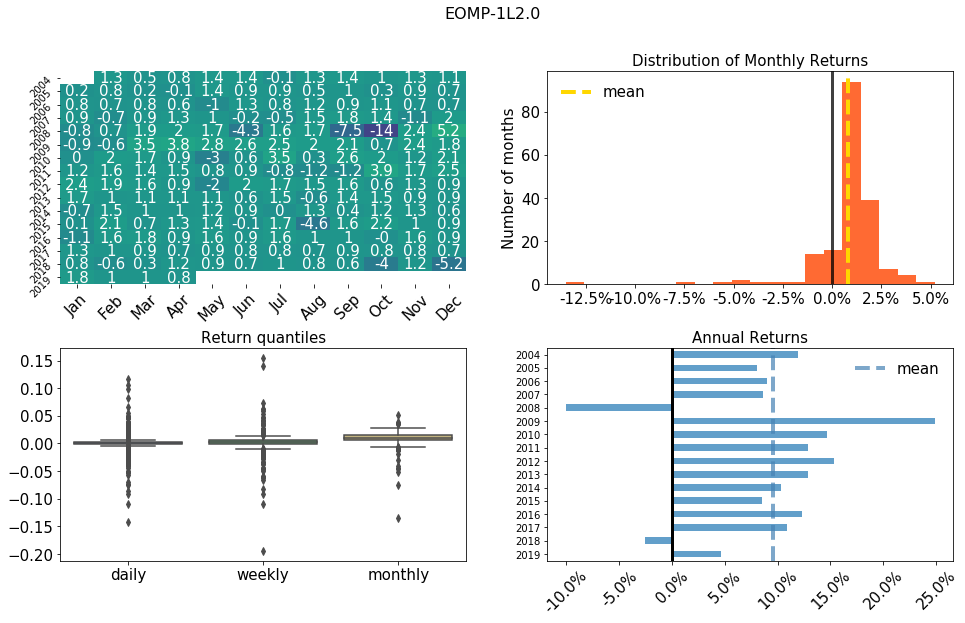

In [5]:
plot_performance_quad(returns, font_size=15)

In [ ]:
font_size = 9
fig_path = Path.home() / 'Dropbox' / 'outputDev' / 'fig'
rcParams['font.sans-serif'] = 'Roboto Condensed'
rcParams['font.family'] = 'sans-serif'
bb = bbox.Bbox([[0.25, 0.25], [7.46, 4.2]])

text_color_light = '#3f5378'
text_color_dark = '#263248'
text_color_yellow = '#ff9800'
def color_axis(ax, txt_color):
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_color(txt_color)
        
def invisible_spines(ax):        
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap   


def grid_xticks_format(ax_list):
    _ = [ax.grid(color='grey', 
                 linestyle=':', 
                 linewidth=1, 
                 alpha=0.5) for ax in ax_list]

    _ = [ax.tick_params(
        axis='both',          # changes apply to the both axis 'x', 'y'
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,
        left=False)  for ax in ax_list]
    return ax

# Chart:
## Excess Return Performance quad

In [ ]:
_ = plot_performance_quad(returns)

# Chart: 
## Monthly Return Heatmap

In [ ]:
fig = plt.figure(figsize=(8, 4.5), dpi=600, facecolor='None', edgecolor='None')
monthly_ret_table = pf.timeseries.aggregate_returns(returns, 'monthly')
monthly_ret_table = monthly_ret_table.unstack().round(3)
ax = plt.gca()
cmap = matplotlib.cm.viridis
new_cmap = truncate_colormap(cmap, 0.2, 0.8)
# new_cmap=cmap
sns.heatmap(
    monthly_ret_table.fillna(0) *
    100.0,
    annot=True,
    annot_kws={
        "size": font_size},
    alpha=1.0,
    center=0.0,
    cbar=False,
    mask=monthly_ret_table.isna(),
    cmap=new_cmap,
    ax=ax)

_=ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
color_axis(ax, text_color_light)
ax.tick_params(axis='both', colors=text_color_light)
plt.savefig(fig_path / 'heat_map', dpi=300, bbox_inches='tight', transparent=True)

# Chart:
## Cumulative Excess return

In [ ]:
top=5 # Number of drawdowns to show
colors = sns.cubehelix_palette(top, start=2.8, rot=.1, dark=0.4)[::-1]
fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=600, 
                 facecolor='None', 
                 edgecolor='None')
gs = gridspec.GridSpec(2, 1, wspace=0.5, hspace=0.25)
ax_worst_drawdown = plt.subplot(gs[0, :])
ax_underwater = plt.subplot(gs[1, :], sharex=ax_worst_drawdown)
grid_xticks_format([ax_worst_drawdown, ax_underwater])
#   Chart 1
return_index.plot(lw=1, 
                  color=text_color_dark,
                  label=returns.name, 
                  alpha=1,
                  ax=ax_worst_drawdown,
                  grid=True)

df_drawdowns = pf.timeseries.gen_drawdown_table(returns, top=top)
peak = pd.DatetimeIndex(df_drawdowns['peak date'])
recovery = pd.DatetimeIndex(df_drawdowns['recovery date'].fillna(returns.index[-1]))

for index, (start, end) in enumerate(zip(peak, recovery)):
    ax_worst_drawdown.axvspan(start, 
                              end, 
                              color=colors[index],
                              alpha=0.75)
    
ax_worst_drawdown.set_ylabel('Cumulative returns')
ax_worst_drawdown.set_xlabel('')
ax_worst_drawdown.set_title('Cumulative Excess Returns & Worst {} Drawdowns'.format(top))          
ax_worst_drawdown.set_ylabel('Cumulative Excess Returns')
ax_worst_drawdown.yaxis.set_label_coords(-0.07, 0.5)
ax_worst_drawdown.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

leg2 = ax_worst_drawdown.legend(framealpha=0.0, prop={'size': font_size})   
[(text.set_size(font_size), text.set_color(text_color_light)) for text in leg2.get_texts()]

color_axis(ax_worst_drawdown, text_color_light)
invisible_spines(ax_worst_drawdown)

#   Chart 2
df_cum_rets = pf.timeseries.cum_returns(returns, starting_value=1.0)
running_max = np.maximum.accumulate(df_cum_rets)
underwater = -100 * ((running_max - df_cum_rets) / running_max)
underwater.plot(ax=ax_underwater, 
                kind='area', 
                color=text_color_yellow,
                alpha=0.7,
                grid=True)

ax_underwater.set_ylabel('Drawdown')
ax_underwater.set_title('Underwater Plot')
ax_underwater.set_xlabel('')
ax_underwater.yaxis.set_major_formatter(FormatStrFormatter('%0.0f%%'))
ax_underwater.yaxis.set_label_coords(-0.07, 0.5)         
ax_underwater.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
color_axis(ax_underwater, text_color_light)
invisible_spines(ax_underwater)
plt.autoscale(enable=True, axis='x', tight=True)

fig.savefig(fig_path / 'cum_perf', dpi=300, bbox_inches=bb, transparent=True)

# Add cash to overlay

In [ ]:
cash = opt_sim.usZeroYldCurve.cash_index[return_index.index]
cash = cash / cash[0] * 100
cash = cash.rename('Cash Collateral')
overlay_cash_idx = return_index * cash
overlay_cash_idx = overlay_cash_idx / overlay_cash_idx[0] * 100
overlay_cash_idx = overlay_cash_idx.rename('Overlay + Cash')
overlay_cash_ret = overlay_cash_idx.pct_change().dropna(how='any')

average_delta = opt_trade[0].greeks['delta_1545'].mean()
stk_bmrk_ret = all_funds['S&P 500'][return_index.index].pct_change().dropna(how='any') * average_delta 
stk_bmrk_idx = pf.timeseries.cum_returns(stk_bmrk_ret, 100)
stk_bmrk_idx[overlay_cash_idx.index[0]] = 100
stk_bmrk_idx = stk_bmrk_idx.reindex(stk_bmrk_idx.index.sort_values())
stk_bmrk_idx = stk_bmrk_idx.rename('Avg. Delta')

csh_bmrk_ret = cash.pct_change().dropna(how='any') * (1 - average_delta)
bmrk_ret = csh_bmrk_ret + stk_bmrk_ret
bmrk_ret= bmrk_ret.rename('Benchmark')
# Create benchmark index
bmrk_idx = pf.timeseries.cum_returns(bmrk_ret, 100)
bmrk_idx[overlay_cash_idx.index[0]] = 100
bmrk_idx = bmrk_idx.reindex(bmrk_idx.index.sort_values())
bmrk_idx = bmrk_idx.rename(bmrk_ret.name)
overlay_cash_perf= perf_stats(overlay_cash_ret, factor_returns=bmrk_ret)
bmrk_perf = perf_stats(bmrk_ret)
pd.concat([overlay_cash_perf.rename(overlay_cash_ret.name), bmrk_perf.rename(bmrk_ret.name)], axis=1, sort=False)

# Chart:
## Cumulative Total return vs. Benchmark
Benchmark is average delta of simulation times S&P500 total return

In [ ]:
fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=600, 
                 facecolor='None', 
                 edgecolor='None')
gs = gridspec.GridSpec(2, 1, wspace=0.5, hspace=0.25)
ax_worst_drawdown = plt.subplot(gs[0, :])
ax_underwater = plt.subplot(gs[1, :], sharex=ax_worst_drawdown)
grid_xticks_format([ax_worst_drawdown, ax_underwater])
#   Chart 1
overlay_cash_idx.plot(lw=1, 
                  color=text_color_dark,
                  label=overlay_cash_idx.name, 
                  alpha=1,
                  ax=ax_worst_drawdown,
                  grid=True)
bmrk_idx.plot(lw=1, 
                  color=text_color_dark,
                  label=bmrk_idx.name, 
                  alpha=0.5,
                  ax=ax_worst_drawdown,
                  grid=True)

for index, (start, end) in enumerate(zip(peak, recovery)):
    ax_worst_drawdown.axvspan(start, 
                              end, 
                              color=colors[index],
                              alpha=0.75)
    
ax_worst_drawdown.set_ylabel('Cumulative Total Returns')
ax_worst_drawdown.set_xlabel('')
ax_worst_drawdown.set_title('Cumulative Total Returns & Worst {} Drawdowns'.format(top))          
ax_worst_drawdown.set_ylabel('Cumulative Total Returns')
ax_worst_drawdown.yaxis.set_label_coords(-0.07, 0.5)
ax_worst_drawdown.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

leg2 = ax_worst_drawdown.legend(framealpha=0.0, prop={'size': font_size})   
[(text.set_size(font_size), text.set_color(text_color_light)) for text in leg2.get_texts()]

color_axis(ax_worst_drawdown, text_color_light)
invisible_spines(ax_worst_drawdown)

# Chart 2
df_cum_rets = pf.timeseries.cum_returns(overlay_cash_ret, starting_value=1.0)
running_max = np.maximum.accumulate(df_cum_rets)
underwater = -100 * ((running_max - df_cum_rets) / running_max)
underwater.plot(ax=ax_underwater, 
                kind='area', 
                color=text_color_yellow,
                alpha=0.7,
                grid=True)

ax_underwater.set_ylabel('Drawdown')
ax_underwater.set_title('Underwater Plot')
ax_underwater.set_xlabel('')
ax_underwater.yaxis.set_major_formatter(FormatStrFormatter('%0.0f%%'))
ax_underwater.yaxis.set_label_coords(-0.07, 0.5)         
ax_underwater.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
color_axis(ax_underwater, text_color_light)
invisible_spines(ax_underwater)
plt.autoscale(enable=True, axis='x', tight=True)

fig.savefig(fig_path / 'cum_total_perf', dpi=300, bbox_inches=bb, transparent=True)

# Alternative chart
fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=600, 
                 facecolor='None', 
                 edgecolor='None')
gs = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.25)
ax_tr = plt.subplot(gs[:])
overlay_bmrl_diff = overlay_cash_idx - bmrk_idx
overlay_bmrl_diff[overlay_bmrl_diff < 0] = 0
overlay_bmrl_diff = overlay_bmrl_diff.rename(overlay_cash_idx.name)
area_df = pd.concat([bmrk_idx, tmp], axis=1)

pal = [text_color_yellow, text_color_light]         
area_df.plot.area(stacked=True, 
               ax=ax_tr, 
               ylim=ax_worst_drawdown.get_ylim(),
               color=pal,
               alpha=0.5)
color_axis(ax_tr, text_color_light)
invisible_spines(ax_tr)
grid_xticks_format([ax_tr])

plt.autoscale(enable=True, axis='x', tight=True)
ax_tr.set_ylabel('Cumulative Total Returns')
ax_tr.set_xlabel('')
ax_tr.set_title('Cumulative Total Returns'.format(top))          
ax_tr.set_ylabel('Cumulative Total Returns')
ax_tr.yaxis.set_label_coords(-0.07, 0.5)
ax_tr.yaxis.set_major_formatter(FormatStrFormatter('%0.0f'))

handles, labels = ax_tr.get_legend_handles_labels()
leg3 = ax_tr.legend(handles[::-1], labels[::-1], framealpha=0.0, prop={'size': font_size})
[(text.set_size(font_size), text.set_color(text_color_light)) for text in leg3.get_texts()]

fig.savefig(fig_path / 'cum_total_perf2', dpi=300, bbox_inches=bb, transparent=True)

#2nd Alternative chart

# fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
#                  dpi=600, 
#                  facecolor='None', 
#                  edgecolor='None')
# gs = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.25)
# ax_tr2 = plt.subplot(gs[:])

# return_stk_cash = pd.concat([return_index, stk_bmrk_idx, cash], axis=1)
# return_stk_cash['Total'] = return_stk_cash[return_stk_cash.columns[0]] * return_stk_cash[return_stk_cash.columns[2]] / (100)
# return_stk_cash['Cash+Delta'] = return_stk_cash[return_stk_cash.columns[1]] * return_stk_cash[return_stk_cash.columns[2]] / (100)

# strat_idx = return_stk_cash['Total'] - return_stk_cash['Cash+Delta']
# delta_idx = return_stk_cash['Cash+Delta'] - return_stk_cash['Cash Collateral']
# strat_idx[strat_idx < 0]=0
# delta_idx[delta_idx < 0]=0
# delta_idx= delta_idx.rename('Delta')
# strat_idx=strat_idx.rename('Total Return')
# plot_data = pd.concat([cash, delta_idx, strat_idx], axis=1)
# pal = [text_color_dark, text_color_yellow, text_color_light]  
# plot_data.plot(kind='area', 
#                ylim=ax_worst_drawdown.get_ylim(),
#                ax=ax_tr2,
#                color=pal,
#                alpha=0.5)
# color_axis(ax_tr, text_color_light)
# invisible_spines(ax_tr2)
# grid_xticks_format([ax_tr2])



# Chart:
## Greeks

In [ ]:
greek_dict = {'delta_1545':'Delta', 'gamma_1545': 'Gamma', 'theta_1545': 'Theta',
              'vega_1545':'Vega', 'rho_1545' :'Rho'}

for key, value in greek_dict.items():
    
    fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                     dpi=600, 
                     facecolor='None', 
                     edgecolor='None')
    gs = gridspec.GridSpec(1, 1, wspace=0.5, hspace=0.25)
    ax_greek = plt.subplot(gs[:])
    grid_xticks_format([ax_greek])
    if key == 'delta_1545':
        ylim=(0, 1.2)
    else:
        ylim=None
    if key == 'gamma_1545':
        greek = opt_trade[sim_idx].greeks[key] * leverage * 100
    else:
        greek = opt_trade[sim_idx].greeks[key] * leverage    
        
    greek.plot(kind='area', color=text_color_light, xlim=(greek.index[0], greek.index[-1]), lw=1.5, \
                    ylim=ylim, ax=ax_greek, grid=True, alpha=0.8)
# , title ='Portfolio {}'.format(value)
    ax_greek.set_ylabel(value)
    ax_greek.axhline(greek.mean(),
                     color=text_color_yellow,
                     ls='--',
                     lw=1.5,
                     alpha=1.0)
    greek_leg = ax_greek.legend(['_no_legend', 'Average: {:0.1f}'.format(greek.mean())], fancybox=True, \
                                    framealpha=0.0, prop={'size': font_size})
    [(text.set_size(font_size), text.set_color(text_color_light)) for text in greek_leg.get_texts()]
    
    ax_greek.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
    color_axis(ax_greek, text_color_light)
    invisible_spines(ax_greek)
    plt.autoscale(enable=True, axis='x', tight=True)
    fig.tight_layout(pad=0)
    bb = bbox.Bbox([[0.25, 0.25], [7.46, 4.2]])
    fig.savefig(fig_path / value, dpi=300, transparent=True,  bbox_inches=bb)

# Overlay + Funds

In [ ]:
all_fund_perf = [perf_stats(all_funds[col].dropna(how='any').pct_change()) for col in all_funds.columns]
all_fund_perf = [fund.rename(fund_name) for fund, fund_name in zip(all_fund_perf, all_funds.columns)]
all_fund_perf = pd.concat(all_fund_perf, axis=1)
display(all_fund_perf.style)

In [ ]:
overlay_fund_idx = [return_index * all_funds[col] for col in all_funds.columns]
overlay_fund_perf = [perf_stats(overlay_fund.pct_change().dropna(how='any')) for overlay_fund in overlay_fund_idx]
overlay_fund_perf = [fund.rename(name) for fund, name in zip(overlay_fund_perf, all_funds.columns)]
overlay_fund_perf = pd.concat(overlay_fund_perf, axis=1)
col_bool = sum([all_funds.columns.str.contains(item) for item in ['VG']]) > 0
# overlay_fund_perf.loc[:, col_bool]
overlay_fund_perf

# HFRX Daily indices vs. Cash Overlay

In [ ]:
hfrx = hfrx_full.dropna(how='any', axis=1)
col_bool = sum([hfrx.columns.str.contains(item) for item in ['CHF', 'EUR', 'GBP', 'JPY']]) == 0
hfrx = hfrx.loc[:, col_bool]

chart_rows = hfrx.shape[1] // 3 + np.mod(hfrx.shape[1], 3)
hfrx = hfrx.reindex(return_index.index)
hfrx = hfrx / hfrx.iloc[0,:] * 100
hfrx_log = np.log(hfrx)

axes = hfrx.reindex(return_index.index).plot(subplots=True, figsize=(16, 32), layout=(chart_rows,3))
overlay_fund_idx_rebased = overlay_cash_idx * 1000
list_axes = list(np.ndarray.flatten(axes))
_= [overlay_cash_idx.plot(color='k', ax=ax) for ax in list_axes]
_= [ax.autoscale(enable=True, axis='x', tight=True) for ax in list_axes]
_= [color_axis(ax, text_color_light) for ax in list_axes]
_= [invisible_spines(ax) for ax in list_axes] 
grid_xticks_format(list_axes)    
correlation_data = pd.concat([hfrx, overlay_cash_idx], axis=1)
correlation_data.pct_change().dropna(how='any').corr()

# HFR - Indices vs Cash Overlay

In [ ]:
hfr = hfri_full['HFRI Fund Weighted Composite Index'] # or hfrr_full
yearly_returns = pf.timeseries.aggregate_returns(hfr.pct_change().dropna(how='any'), 'yearly')
yearly_returns = pd.concat([yearly_returns, pf.timeseries.aggregate_returns(overlay_cash_ret, 'yearly')], axis=1)

# hfr.pct_change().dropna(how='any')
# rebased_funds, rebased_overlay = zip(*[(fund.iloc[:, 0], fund.iloc[:, 1]) for fund in paired_hfr_funds])
# all_rebased_funds = pd.concat(rebased_funds, axis=1)
# chart_rows = all_rebased_funds.shape[1] // 3 + np.mod(all_rebased_funds.shape[1], 3)
# axes = all_rebased_funds.plot(subplots=True, figsize=(16, 32), layout=(chart_rows,3))
# list_axes = list(np.ndarray.flatten(axes))
# _= [fund.plot(color='k', ax=ax) for ax, fund in zip(list_axes, rebased_overlay)]
# _= [ax.autoscale(enable=True, axis='x', tight=True) for ax in list_axes]
# _= [color_axis(ax, text_color_light) for ax in list_axes]
# _= [invisible_spines(ax) for ax in list_axes] 
# _= grid_xticks_format(list_axes)

# hfri_perf = pd.concat([pf.timeseries.perf_stats(hfri_full[col].pct_change().dropna(how='any')) for col in hfri_full.columns], axis=1)
# hfri_perf

yearly_returns.dropna(how='any') *100
hfri_overlay  = pd.concat([hfr, overlay_monthly.reindex(hfr.index).ffill()], axis=1)
hfri_overlay = hfri_overlay.dropna(how='any')
hfri_overlay = hfri_overlay / hfri_overlay.iloc[0, :] * 100

fig = plt.figure(figsize=(8, 4.5), #16/9 Aspect ratio
                 dpi=600, 
                 facecolor='None', 
                 edgecolor='None')
gs = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.25)
# Annual returns
ax_annual = plt.subplot(gs[:, 0])
return_plot_df = yearly_returns.dropna(how='any').sort_index(ascending=False)
(100 * return_plot_df).plot(kind='barh',
            alpha=0.70, 
            ax=ax_annual,
            color=[text_color_light, text_color_yellow],
            legend=False)

ax_annual.axvline(0.0, color=text_color_light, linestyle=':', lw=1)


# Equity lines
ax_equity = plt.subplot(gs[:, 1])
hfri_overlay.plot(ax=ax_equity,
                  color=[text_color_light, text_color_yellow],
                  alpha=0.70,
                  legend=False)

list_axes = [ax_equity, ax_annual]
leg = fig.legend(ax_equity.get_lines(),
                 hfri_overlay.columns,
                 'upper center',
                 fancybox=True,
                 framealpha=0.0,
                 prop={'size': font_size})
_= [ax.autoscale(enable=True, axis='x', tight=True) for ax in list_axes]
_= [color_axis(ax, text_color_light) for ax in list_axes]
_= [invisible_spines(ax) for ax in list_axes] 
_= [ax.tick_params(axis='both', colors=text_color_light) for ax in list_axes]
grid_xticks_format([ax_equity])
[(text.set_size(font_size), text.set_color(text_color_light)) for text in leg.get_texts()]
plt.xticks(rotation=45)
plt.autoscale(enable=True, axis='x', tight=True)
# ax_tr.set_ylabel('Cumulative Total Returns')
ax_equity.set_xlabel('')
# ax_tr.set_title('Cumulative Total Returns'.format(top))          
# ax_tr.set_ylabel('Cumulative Total Returns')
# ax_tr.yaxis.set_label_coords(-0.07, 0.5)
ax_annual.xaxis.set_major_formatter(FormatStrFormatter('%0.0f%%'))
bb_2 = bbox.Bbox([[0.1, 0.1], [8, 4.5]])
fig.savefig(fig_path / 'hfri_overlay', dpi=300, transparent=True,  bbox_extra_artists=(leg,), bbox_inches=bb_2)

# Alternative Funds vs. Cash overlay

In [ ]:
vanguard_bool = sum([all_funds.columns.str.contains(item) for item in ['VG']]) > 0
sp5_bool = sum([all_funds.columns.str.contains(item) for item in ['500']]) > 0
column_bool = np.logical_not(vanguard_bool + sp5_bool)

paired_funds = [pd.concat([all_funds[col], overlay_cash_idx ], axis=1).dropna(how='any') 
                 for col in all_funds.loc[:, column_bool].columns]

paired_funds = [fund / fund.iloc[0, :] * 100 for fund in paired_funds]
rebased_funds, rebased_overlay = zip(*[(fund.iloc[:, 0], fund.iloc[:, 1]) for fund in paired_funds])
all_rebased_funds = pd.concat(rebased_funds, axis=1)
chart_rows = all_rebased_funds.shape[1] // 3 + np.mod(all_rebased_funds.shape[1], 3)

# Cumulative return charts
axes = all_rebased_funds.plot(subplots=True, figsize=(16, 32), layout=(chart_rows,3))
list_axes = list(np.ndarray.flatten(axes))
_= [fund.plot(color='k', ax=ax) for ax, fund in zip(list_axes, rebased_overlay)]
_= [ax.autoscale(enable=True, axis='x', tight=True) for ax in list_axes]
_= [color_axis(ax, text_color_light) for ax in list_axes]
_= [invisible_spines(ax) for ax in list_axes] 
_= grid_xticks_format(list_axes)

fig, axes = plt.subplots(chart_rows, 3, sharey=True, figsize=(16, 32))
paired_sp5_funds = [pd.concat([all_funds[col], all_funds['S&P 500'] ], axis=1).dropna(how='any') 
                 for col in all_funds.loc[:, column_bool].columns]
paired_sp5_funds = [fund.resample('BM').ffill() for fund in paired_sp5_funds]
paired_sp5_funds = [fund.pct_change().dropna(how='any') for fund in paired_sp5_funds]
list_axes = list(np.ndarray.flatten(axes))
colors = sns.cubehelix_palette(13, rot=-.4, dark=0.2)

# _= [sns.lmplot.plot(x=0, y=1, data=fund, kind='scatter', ax=ax, color=(color,),fit_reg=True)
#     for fund, ax, color in zip(paired_sp5_funds, list_axes, colors)]
    
for fund, ax, color in zip(paired_sp5_funds, list_axes, colors):
    x_name = fund.columns[0]
    y_name = fund.columns[-1]
    sns.regplot(x=x_name, y=y_name, data=fund, fit_reg=True, ax=ax, color=color)
_= [ax.autoscale(enable=True, axis='x', tight=True) for ax in list_axes]
_= [color_axis(ax, text_color_light) for ax in list_axes]
_= [invisible_spines(ax) for ax in list_axes] 
_= grid_xticks_format(list_axes)
_= [ax.xaxis.set_major_formatter(FormatStrFormatter('%0.02f')) for ax in list_axes]
fig.delaxes(axes[4][2])
fig.delaxes(axes[4][1])

In [ ]:
# hfrx_list = [hfrx_full[col].pct_change().dropna(how='any') for col in hfrx_full.columns]
# hfrx_perf = [perf_stats(fund) for fund in hfrx_list]
# hfrx_perf = [fund.rename(name) for fund, name in zip(hfrx_perf, hfrx_full.columns)]
# hfrx_perf = pd.concat(hfrx_perf, axis=1)
# hfrx_perf.style

In [ ]:
foobar = pd.concat([return_index, stk_bmrk_idx, cash], axis=1)
foobar['Total'] = foobar[foobar.columns[0]] * foobar[foobar.columns[2]] / (100)
foobar['Cash+Delta'] = foobar[foobar.columns[1]] * foobar[foobar.columns[2]] / (100)

strat_idx = foobar['Total'] - foobar['Cash+Delta']
delta_idx = foobar['Cash+Delta'] - foobar['Cash Collateral']
strat_idx[strat_idx < 0]=0
delta_idx[delta_idx < 0]=0
delta_idx= delta_idx.rename('Delta')
strat_idx=strat_idx.rename('Total Return')
plot_data = pd.concat([cash, delta_idx, strat_idx], axis=1)
plot_data.plot(kind='area', ylim=ax_worst_drawdown.get_ylim())


In [ ]:
# import struct

# fig_dict = {'heat': 'heat_map.png',
# 'cum': 'cum_perf.png',
# 'tr': 'cum_total_perf.png',
# 'delta': 'Delta.png',
# 'gamma': 'Gamma.png',
# 'vega': 'Vega.png',
# 'rho': 'Rho.png',
# 'vega': 'Theta.png'}
# for key, value in fig_dict.items():
#     fname = str(fig_path / value)
#     with open(fname, 'rb') as fhandle:
#             head = fhandle.read(24)
#     width, height = struct.unpack('>ii', head[16:24])
#     print('{0} width {1}, height {2}, ratio {3}'.format(key, width, height, width/height))
# imgdata = urlretrieve(str(fig_path / 'Delta'))
# image_type,width,height = getimageinfo.getImageInfo(imgdata)



adj_vega= opt_trade[0].greeks['vega_1545']/opt_trade[0].greeks['active_underlying_price_1545'] *100
adj_vega.plot()

In [3]:
df = pd.DataFrame([[4, 9],] * 3, columns=['A', 'B'])
df.apply(np.sum, axis=0)

A    12
B    27
dtype: int64

In [4]:
df

,A,B
0,4,9
1,4,9
2,4,9
